In [5]:
#Importing Libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [6]:
# Adjust the path
unicorns_csv_path= '/Users/eleni_icon/Unicorns/2 Data/Prepared data/Cleaned_Unicorns_Data.csv'
data =pd.read_csv(unicorns_csv_path)

In [7]:
# Step 3: Subset the data
# Convert 'Date Joined' to datetime for time-series analysis
data['Date Joined'] = pd.to_datetime(data['Date Joined'])

# Sort the data by 'Date Joined'
data = data.sort_values(by='Date Joined')

# Subset the data to focus on relevant columns
subset_data = data[['Date Joined', 'Valuation ($B)']]

# Reset the index for time-series compatibility
subset_data = subset_data.set_index('Date Joined')

# Display the first few rows of the subset
subset_data.head()

,Valuation ($B)
Date Joined,
2007-07-02,1.38
2011-12-12,6.70
2012-02-13,2.00
2012-06-06,31.00
2012-12-01,150.00


The dataset was filtered to include only the columns `Date Joined` and `Valuation ($B)` for time-series analysis.
The `Date Joined` column was converted to datetime format to enable chronological sorting and analysis.


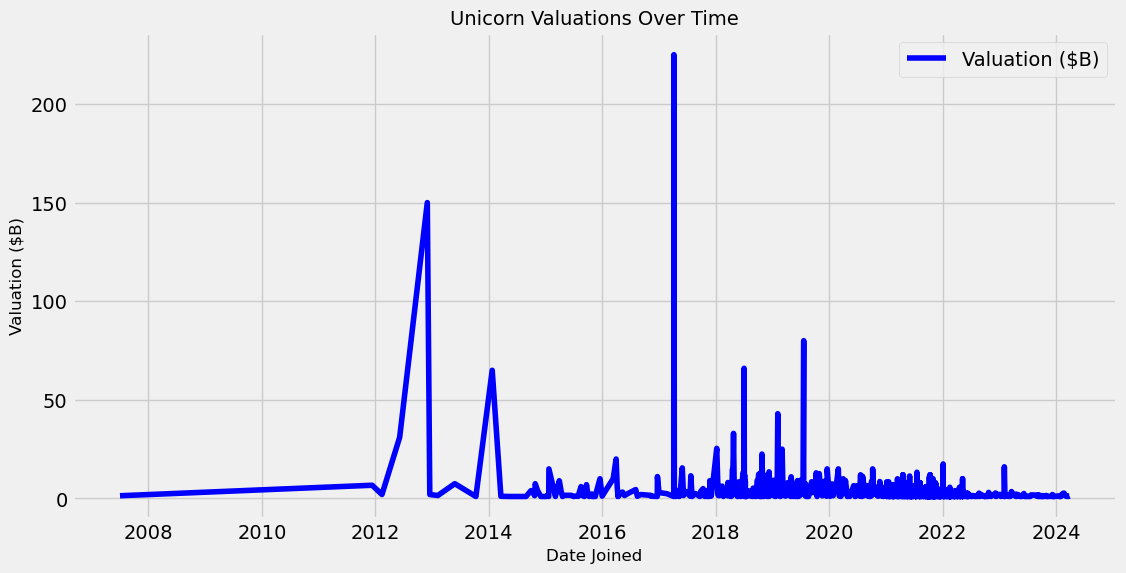

In [8]:
#Step 4: Create a line chart of unicorn valuations over time
plt.figure(figsize=(12, 6))
plt.plot(subset_data.index, subset_data['Valuation ($B)'], label='Valuation ($B)', color='blue')
plt.title('Unicorn Valuations Over Time', fontsize=14)
plt.xlabel('Date Joined', fontsize=12)
plt.ylabel('Valuation ($B)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

The line chart shows the trend of unicorn valuations over time. Key observations:

There are significant spikes in valuation for some companies, such as ByteDance and SpaceX, which stand out due to their high valuations.
The trend appears to show increasing unicorn formation over time, particularly after 2015, reflecting the rise of high-valuation startups in recent years.


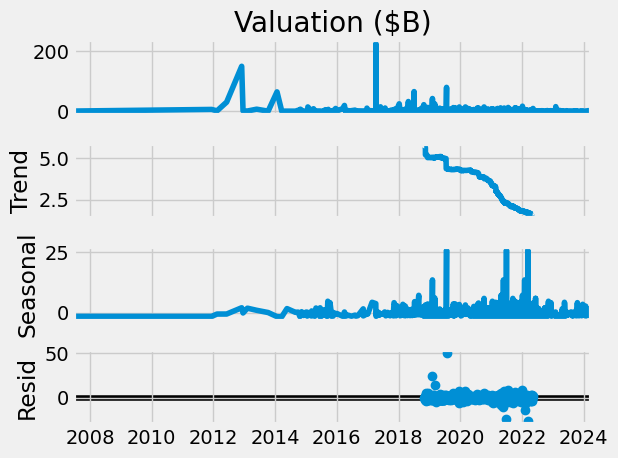

In [10]:
#Step 5: Decompose the data's components
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series data
decomposition = seasonal_decompose(subset_data['Valuation ($B)'], model='additive', period=365)

# Plot the decomposed components
decomposition.plot()
plt.show()

The time series was decomposed into its main components:
1. **Trend**: Represents the overall direction of valuations over time.
2. **Seasonal**: Captures any periodic patterns in the data.
3. **Residual**: Reflects the random noise after removing the trend and seasonality.

Observations:
- The trend shows an increase in valuations with significant peaks.
- Seasonality is minimal, indicating no strong recurring patterns.
- Residuals highlight variability, especially around peak valuations.


In [11]:
#Step 6: Conduct a Dickey-Fuller test for stationarity

from statsmodels.tsa.stattools import adfuller

# Perform the Dickey-Fuller test on the valuation data
result = adfuller(subset_data['Valuation ($B)'])

# Print the results
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

ADF Statistic: -33.570749147303935
p-value: 0.0
Critical Values: {'1%': -3.4356689751083374, '5%': -2.8638888336592387, '10%': -2.5680205519744055}


The results of the Dickey-Fuller test are as follows:

ADF Statistic: -33.57

p-value: 0.0

Critical Values:
1%: -3.436

5%: -2.864

10%: -2.568

Interpretation:

Since the p-value is 0.0 (less than 0.05), we reject the null hypothesis (H₀) that the data is not stationary.
The ADF statistic is significantly less than the critical values at all levels (1%, 5%, and 10%), further confirming that the time series is stationary.


In [14]:
# Step 7 & 8: Differencing (not required as data is stationary)

<Figure size 1200x600 with 0 Axes>

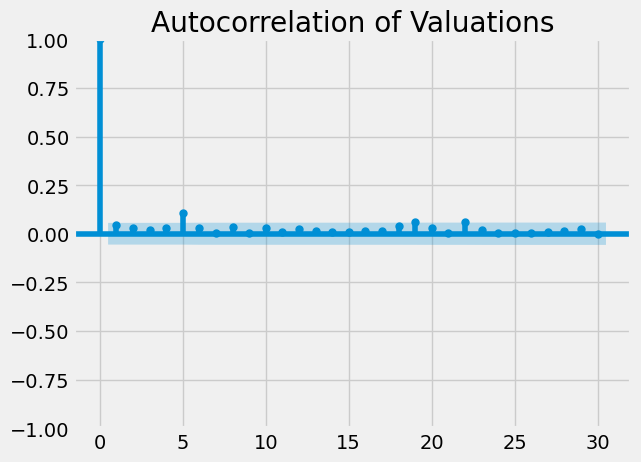

<Figure size 1200x600 with 0 Axes>

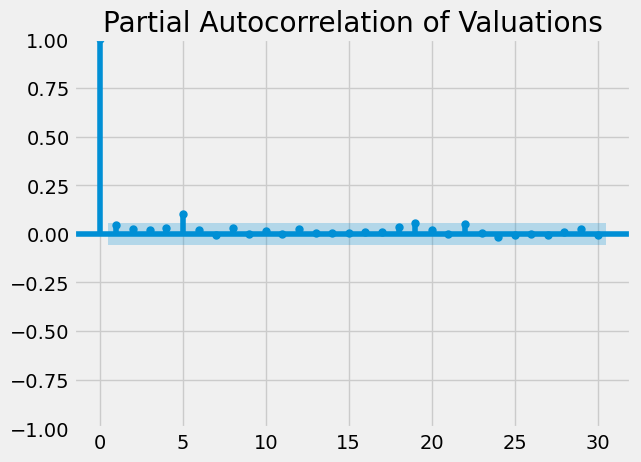

In [15]:
#Step 9: Check Autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the autocorrelation and partial autocorrelation
plt.figure(figsize=(12, 6))
plot_acf(subset_data['Valuation ($B)'], lags=30, title="Autocorrelation of Valuations")
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(subset_data['Valuation ($B)'], lags=30, title="Partial Autocorrelation of Valuations")
plt.show()

Autocorrelation Analysis:


The first lag has a significant autocorrelation, while subsequent lags are relatively small and fall within the confidence interval, indicating minimal longer-term correlations.
Partial Autocorrelation Function (PACF):

The PACF also shows a significant spike at lag 1, indicating that the first lag has the most influence on the valuation series.
Interpretation:
The strong autocorrelation at lag 1 suggests that the valuation of a unicorn is influenced by its immediate prior state.
The absence of significant autocorrelations beyond lag 1 indicates the data does not have strong dependencies at larger time intervals.
